Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].nunique() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

###### verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [ ]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [121]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand             3207 non-null   object  
 1   model             3207 non-null   object  
 2   model_year        3207 non-null   int64   
 3   milage            3207 non-null   int64   
 4   fuel_type         3207 non-null   object  
 5   engine            3207 non-null   object  
 6   transmission      3207 non-null   object  
 7   ext_col           3207 non-null   object  
 8   int_col           3207 non-null   object  
 9   accident          3207 non-null   object  
 10  clean_title       3207 non-null   object  
 11  price             3207 non-null   int64   
 12  Potencia          3207 non-null   float64 
 13  Capacidade_Motor  3207 non-null   float64 
 14  Numero_Cilindros  3207 non-null   float64 
 15  Numero_Valvulas   3207 non-null   float64 
 16  T2                3207 n

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

### Substituir pela mediana :
- num valvulas
- num cilindros
- potencia
- capacidade_motor

In [ ]:
m = p['Numero_Valvulas'].median()
m2 = p['Numero_Cilindros'].median()
m3 = p['Potencia'].median()
m4 = p['Capacidade_Motor'].median()

p['Numero_Valvulas'].fillna(m, inplace=True)
p['Numero_Cilindros'].fillna(m2, inplace=True)
p['Potencia'].fillna(m3, inplace=True)
p['Capacidade_Motor'].fillna(m4, inplace=True)

#### Clean title

In [105]:
p['clean_title'] = p['clean_title'].fillna('No')

#### TRANSMISSION SEP -> Novo atributo

In [106]:
# import numpy as np
p['T2'] = p['transmission'].str.extract(r'(\d+)')
p['T2'] = pd.to_numeric(p['T2'], errors='coerce')
m5 = p['T2'].mean() 
p['T2'].fillna(round(m5), inplace=True)
#p.head()
#p['T2'].isnull().sum()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\1509115020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p['T2'].fillna(round(m5), inplace=True)


### Nova categoria k(means) -> Categoria_ET   (engine+ transmission)

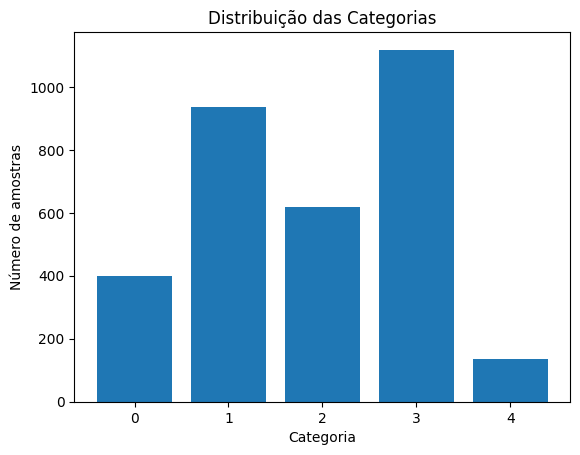

In [107]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 5

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
p['Categoria_ET'] = kmeans.labels_
import matplotlib.pyplot as plt

# Contagem de amostras em cada categoria
categoria_counts = p['Categoria_ET'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(categoria_counts.index, categoria_counts.values)

# Adicionar rótulos e título
plt.xlabel('Categoria_ET')
plt.ylabel('Número de amostras')
plt.title('Distribuição das Categorias')

# Mostrar o gráfico
plt.show()



In [ ]:
p.info()

In [108]:
p['Categoria_ET'] = p['Categoria_ET'].astype('category')

#### Categoria Marca

In [109]:
frequencias = p['brand'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Marca'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Marca'
    else:
        return 'Média Frequência Marca'
    


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Marca'] = p['brand'].map(frequencias.apply(categorizar))

p['Categoria_Marca'] = p['Categoria_Marca'].astype('category')
p['Categoria_Marca'].value_counts()

Categoria_Marca
Alta Frequência Marca     2246
Média Frequência Marca     928
Baixa Frequência Marca      33
Name: count, dtype: int64

#### Categoria Modelo

In [110]:
frequencias = p['model'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Modelo'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Modelo'
    else:
        return 'Média Frequência Modelo'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Modelo'] = p['model'].map(frequencias.apply(categorizar))
p['Categoria_Modelo'] = p['Categoria_Modelo'].astype('category')
p['Categoria_Modelo'].value_counts()


Categoria_Modelo
Alta Frequência Modelo     2178
Baixa Frequência Modelo    1029
Name: count, dtype: int64

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Remoção outliers LOF
- Variavies cat -> numerica

In [115]:
data1 = p

In [ ]:
data1.describe()

In [ ]:
data1.head()

### NULL's substitution

#### fuel_type + engine + ext_col + int_col + accident + transmission (subsituir na's pela moda)

In [116]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod6)


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\3368779346.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['fuel_type'].fillna('Eletric', inplace=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\3368779346.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

#### Categoria cor interna

In [117]:
frequencias = data1['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_IntCol'] = data1['int_col'].map(frequencias.apply(categorizar))
data1['Categoria_IntCol'] = data1['Categoria_IntCol'].astype('category')
data1['Categoria_IntCol'].value_counts()

Categoria_IntCol
Alta Frequência ext_col     3114
Baixa Frequência ext_col      93
Name: count, dtype: int64

##### Categoria cor externa

In [114]:
frequencias = data1['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_ExtCol'] = data1['ext_col'].map(frequencias.apply(categorizar))
data1['Categoria_ExtCol'] = data1['Categoria_ExtCol'].astype('category')
data1['Categoria_ExtCol'].value_counts()

Categoria_ExtCol
Alta Frequência ext_col     3031
Baixa Frequência ext_col     176
Name: count, dtype: int64

#### Correlações

In [122]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data1.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)


Matriz de correlação de Spearman:
                  model_year    milage     price  Potencia  Capacidade_Motor  \
model_year          1.000000 -0.718429  0.698830  0.261190         -0.106556   
milage             -0.718429  1.000000 -0.758839 -0.313988          0.048463   
price               0.698830 -0.758839  1.000000  0.614442          0.246794   
Potencia            0.261190 -0.313988  0.614442  1.000000          0.562609   
Capacidade_Motor   -0.106556  0.048463  0.246794  0.562609          1.000000   
Numero_Cilindros   -0.093323  0.002664  0.286044  0.635383          0.901587   
Numero_Valvulas    -0.136779  0.044956  0.057261  0.000422          0.174043   
T2                  0.422990 -0.297194  0.334416  0.177560         -0.015619   

                  Numero_Cilindros  Numero_Valvulas        T2  
model_year               -0.093323        -0.136779  0.422990  
milage                    0.002664         0.044956 -0.297194  
price                     0.286044         0.057261  

In [123]:
#va categorica
categorical_columns = data1.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data1[column], data1['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

[('engine', 0.5839711215715309),
 ('accident', 0.2777408699071016),
 ('Categoria_ExtCol', 0.13655303065073213),
 ('Categoria_IntCol', 0.12564937018484723),
 ('int_col', 0.10998538776072264),
 ('transmission', 0.042976118967526955),
 ('brand', 0.018090998646138497),
 ('fuel_type', 0.0056075880980175075),
 ('model', 0.0020766957914058726),
 ('ext_col', -0.025449157694537174),
 ('Categoria_Modelo', -0.11076022863080363),
 ('Categoria_Marca', -0.1389834952504768),
 ('clean_title', -0.22176990480646688),
 ('Categoria_ET', -0.2667049295450825)]

### Outlier por IQR -> V.a Numéricas

In [129]:
outlier_indices_dict = {}

# Variáveis Numéricas
for column in data1.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data1[column] > Q1 - 1.5*IQR) & (data1[column] < Q3 + 1.5*IQR))

    outlier_indices_dict[column] = data1.loc[~outlier_conditional].index
    
    num_outliers = len(data1[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")



Número de outliers em 'model_year': 68
Número de outliers em 'milage': 58
Número de outliers em 'price': 198
Número de outliers em 'Potencia': 136
Número de outliers em 'Capacidade_Motor': 6
Número de outliers em 'Numero_Cilindros': 57
Número de outliers em 'Numero_Valvulas': 3207
Número de outliers em 'T2': 376


###### O número de válvulas têm muito pouca correlação com o preço -> N utiliza-se essa coluna para os cenários!
###### Remove-se os 6 registros da capacidade do motor e os 57 com num de cilindros e 376 do T2


##### Remover registros com outliers (cujo correlação baixo com preço)

In [132]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data1_s_out = data1.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data1_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data1_s_out))


Número de registros no novo conjunto de dados sem outliers: 2771


### Transformar categoricas -> numéricas

In [133]:
#!pip install category_encoders # versao abaixo da 3.12

import  category_encoders as ce
from category_encoders.one_hot import OneHotEncoder
cat_columns = data1.select_dtypes(include=['object','category']).columns.tolist()
one_hot_encoder = ce.OneHotEncoder(cols=cat_columns)
data1=one_hot_encoder.fit_transform(data1)

cat_columns2 = data1_s_out.select_dtypes(include=['object','category']).columns.tolist()
one_hot_encoder2 = ce.OneHotEncoder(cols=cat_columns2)
data1_s_out=one_hot_encoder2.fit_transform(data1_s_out)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.p

In [134]:
data1.to_csv('subset_1.csv', index=False) # sem normalizar
data1_s_out.to_csv('subset_1_s_out.csv', index=False) # sem normalizar

# subset 2

-  substituir '-' por desconhecido
- Remoção outliers LOF
- Variavies cat -> numerica

In [135]:
data2=p

In [ ]:
p.columns

### NULL's substitution

### Fuel Type

In [136]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\2341822197.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['fuel_type'].fillna('Eletric', inplace=True)


#### accident + engine + transmission + ex_col + int_col

In [137]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\3677287092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['accident'].fillna('desconhecido', inplace=True)


#### Categoria cor interna

In [138]:
frequencias = data2['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência int_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência int_col'
    else:
        return 'Média Frequência int_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_IntCol'] = data2['int_col'].map(frequencias.apply(categorizar))
data2['Categoria_IntCol'] = data2['Categoria_IntCol'].astype('category')
data2['Categoria_IntCol'].value_counts()

Categoria_IntCol
Alta Frequência int_col     3114
Baixa Frequência int_col      93
Name: count, dtype: int64

#### Categoria cor externa

In [139]:
frequencias = data2['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    else:
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_ExtCol'] = data2['ext_col'].map(frequencias.apply(categorizar))
data2['Categoria_ExtCol'] = data2['Categoria_ExtCol'].astype('category')
data2['Categoria_ExtCol'].value_counts()

Categoria_ExtCol
Alta Frequência ext_col     3031
Baixa Frequência ext_col     176
Name: count, dtype: int64

### Correlações

In [140]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data2.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)

Matriz de correlação de Spearman:
                  model_year    milage     price  Potencia  Capacidade_Motor  \
model_year          1.000000 -0.718429  0.698830  0.261190         -0.106556   
milage             -0.718429  1.000000 -0.758839 -0.313988          0.048463   
price               0.698830 -0.758839  1.000000  0.614442          0.246794   
Potencia            0.261190 -0.313988  0.614442  1.000000          0.562609   
Capacidade_Motor   -0.106556  0.048463  0.246794  0.562609          1.000000   
Numero_Cilindros   -0.093323  0.002664  0.286044  0.635383          0.901587   
Numero_Valvulas    -0.136779  0.044956  0.057261  0.000422          0.174043   
T2                  0.422990 -0.297194  0.334416  0.177560         -0.015619   

                  Numero_Cilindros  Numero_Valvulas        T2  
model_year               -0.093323        -0.136779  0.422990  
milage                    0.002664         0.044956 -0.297194  
price                     0.286044         0.057261  

In [141]:
#va categorica
categorical_columns = data2.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data2[column], data2['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

[('engine', 0.5839711215715309),
 ('accident', 0.2777408699071016),
 ('Categoria_ExtCol', 0.13655303065073213),
 ('Categoria_IntCol', 0.12564937018484723),
 ('int_col', 0.10998538776072264),
 ('transmission', 0.042976118967526955),
 ('brand', 0.018090998646138497),
 ('fuel_type', 0.0056075880980175075),
 ('model', 0.0020766957914058726),
 ('ext_col', -0.025449157694537174),
 ('Categoria_Modelo', -0.11076022863080363),
 ('Categoria_Marca', -0.1389834952504768),
 ('clean_title', -0.22176990480646688),
 ('Categoria_ET', -0.2667049295450825)]

### Outlier por IQR -> V.a Numéricas

In [142]:
# Variáveis Numéricas
for column in data2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data2[column] > Q1 - 1.5*IQR) & (data2[column] < Q3 + 1.5*IQR))
    outlier_indices_dict[column] = data.loc[~outlier_conditional].index
    
    num_outliers = len(data2[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")


Número de outliers em 'model_year': 68
Número de outliers em 'milage': 58
Número de outliers em 'price': 198
Número de outliers em 'Potencia': 136
Número de outliers em 'Capacidade_Motor': 6
Número de outliers em 'Numero_Cilindros': 57
Número de outliers em 'Numero_Valvulas': 3207
Número de outliers em 'T2': 376


##### Remover registros com outliers (cujo correlação baixo preço)

In [143]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data2_s_out = data2.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data2_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data2_s_out))


Número de registros no novo conjunto de dados sem outliers: 2771


### Transformação de variáveis categoricas em numéricas

In [144]:
#!pip install category_encoders # versao abaixo da 3.12

import  category_encoders as ce
from category_encoders.one_hot import OneHotEncoder
cat_columns = data2.select_dtypes(include=['object','category']).columns.tolist()
one_hot_encoder = ce.OneHotEncoder(cols=cat_columns)
data2=one_hot_encoder.fit_transform(data2)

cat_columns2 = data2_s_out.select_dtypes(include=['object','category']).columns.tolist()
one_hot_encoder2 = ce.OneHotEncoder(cols=cat_columns2)
data2_s_out=one_hot_encoder2.fit_transform(data2_s_out)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.p

In [145]:
data2.to_csv('subset_2.csv', index=False) # sem normalizar
data2_s_out.to_csv('subset_2_s_out.csv', index=False) # sem normalizar

In [148]:
p.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2', 'Categoria_ET', 'Categoria_Marca',
       'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol'],
      dtype='object')

# Cenário 1 -> todas as variáveis

# Cenário 2

In [ ]:
ck1=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]

# Regressão Linear 1

(características do carro (só com variáveis numéricas)) do subset 1


### Separar Data / Treinar e Avaliar Algoritmos

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
# import shap

In [ ]:


X = ck1.drop(['price'], axis=1) 
y = ck1['price'] 

In [ ]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas
# Option 1: Fill missing values, for example with the median or mean
# X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


#### RANDOM FOREST

In [ ]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

In [ ]:
# Regression metrics for Random Forest
from slickml.metrics import RegressionMetrics

reg_metrics = RegressionMetrics(y_test, pred)
reg_metrics.plot()

# CORRELATION

In [ ]:
import seaborn as sns

dados_numericos = data.select_dtypes(include=['number'])
correlation_matrix = dados_numericos.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# preço está bastante correlacionado com potência e ano de fábrico

correlação p/ preço/nº valvulas diminui muito quando se substitui NaN (0.51 para 0.11)

# Regressão Linear 2

In [ ]:
# selecionar as colunas necessárias a partir do df SEM OUTLIERS
ck3=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'fuel_type', 'accident', 'clean_title']]
X = ck3.drop(['price'], axis=1) 
y = ck3['price'] 

In [ ]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas 
# Option 1: Fill missing values, for example with the median or mean
X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)´

# nao precisa mais desse codigo em cima dessa linha

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

erro um pouco menor do que R1

#### CORES

In [ ]:
def simplify_color(color):
    return color.split()[0]

# Aplicar a função à coluna 'Cor'
p['simp_int_col'] = p['int_col'].apply(simplify_color)
p['simp_ext_col'] = p['ext_col'].apply(simplify_color) # de 265 p/ 191
# n vale a pena

# AD -> Subset 2  -cenário 1

In [ ]:
subset2 = pd.read_csv('subset_2.csv', index_col=False)

### Dividir o dataset em treino e teste

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )   # downloaded from https://github.com/slickml/slick-ml
from matplotlib import pyplot as plt
#import shap

In [ ]:
X = subset2.drop(['price'], axis=1)  # sem os outliers 
y = subset2['price'] 

### Normalização

In [ ]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tr[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(X_tr[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])

In [ ]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr, y_tr)
pred3 = DT.predict(X_ts)
# from sklearn.tree import DecisionTreeRegressor
# dt1_model = DecisionTreeRegressor(random_state=0,
#                                            criterion='mse')
# dt1_model.fit(X_tr,y_tr)

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=X_tr.columns)
plt.show()

In [ ]:
# Regression metrics for Decision Tree
reg_metrics3 = RegressionMetrics(y_ts, pred3)
reg_metrics3.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)

In [ ]:
#!pip install graphviz

from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(DT, out_file=None)
graphviz.Source(tree_graph)

## AD -> Subset 1- Cenário1

In [ ]:
subset1 = pd.read_csv('subset_1.csv', index_col=False)

### Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
subset1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(subset1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X = subset1.drop(['price'], axis=1)  # sem os outliers 
y =subset1['price'] 


In [ ]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr, y_tr)
pred3 = DT.predict(X_ts)
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=X_tr.columns)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)
